In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

## Analyse trio stats

In [ ]:
labels = ['ctrl'] * 10 + ['nem-shok'] * 10 + ['nem'] * 10

In [ ]:
# trio_stats = pd.read_csv('./data/interim/redo/trio.stats3.txt', 
trio_stats = pd.read_csv('./data/interim/cor/trio.stats.all.txt', 
                         comment='#', sep='\t', header=None)
trio_stats.columns += 1
trio_stats['group'] = len(trio_stats) // 30 * labels
trio_stats['dnm_mend_ratio'] = (trio_stats[7] - trio_stats[14]) / trio_stats[5]
trio_stats.head(2)

,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,group,dnm_mend_ratio
0,FLT0,CAR2463,CAR2494_M,CAR2493_F,19396121,16553385,469231,264311,5185643,4094882,6793033,6277962,1.08,203640,452046,ctrl,0.013693
1,FLT0,CAR2464,CAR2494_M,CAR2493_F,19706646,16819002,474469,280546,5139178,4301022,6880059,6379747,1.08,192457,455216,ctrl,0.014311


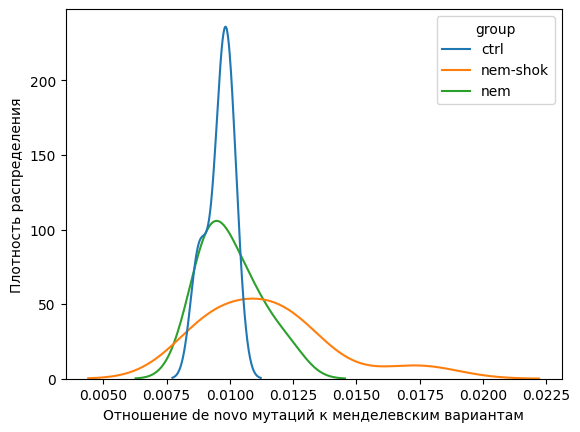

In [ ]:
sns.kdeplot(trio_stats[(trio_stats[1] == 'FLT2') & (trio_stats.dnm_mend_ratio < 0.05)], 
              x='dnm_mend_ratio',  hue='group')
plt.ylabel('Плотность распределения');
plt.xlabel('Отношение de novo мутаций к менделевским вариантам');

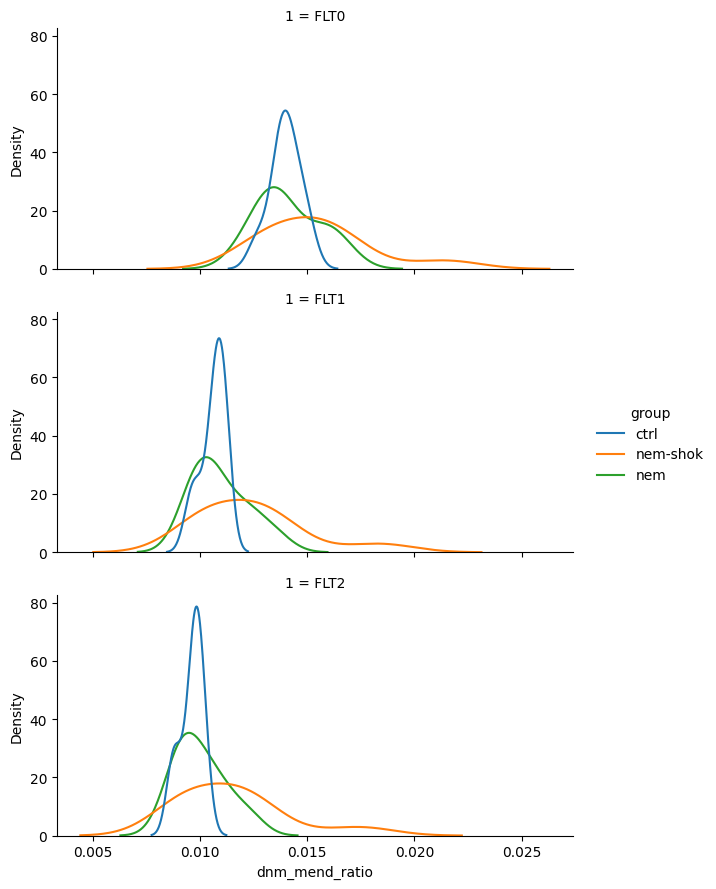

In [ ]:
sns.displot(trio_stats[trio_stats.dnm_mend_ratio < 0.05], 
              x='dnm_mend_ratio', hue='group', row=1, 
              kind='kde', height=3, aspect=2,
)

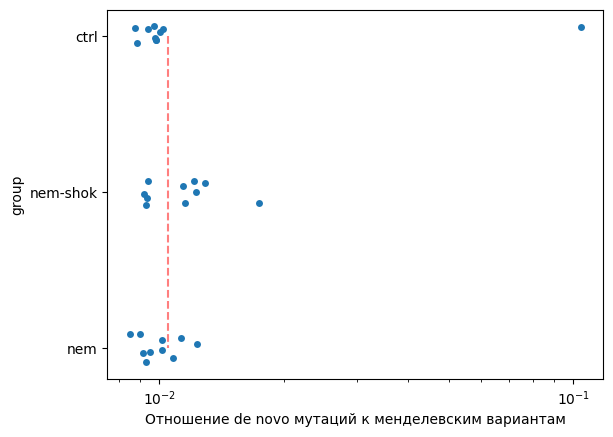

In [ ]:
sns.stripplot(trio_stats[(trio_stats.dnm_mend_ratio < 0.5) & (trio_stats[1] == 'FLT2')], 
              x='dnm_mend_ratio', y='group')

max_ctrl_val = trio_stats[(trio_stats[1] == 'FLT2') & \
                          (trio_stats['group'] == 'ctrl')]['dnm_mend_ratio']\
                                .sort_values().iloc[-2] + 3e-4

plt.vlines(max_ctrl_val, 0, 2, 'red', 'dashed', '0.02', alpha=0.5,)
plt.xlabel('Отношение de novo мутаций к менделевским вариантам')
plt.xscale('log')
plt.savefig('./figures/dnv_mend_ratio.pdf');

In [ ]:
max_ctrl_val

0.010521100291506269

In [ ]:
#wrong
wrong_trio_stats = pd.read_csv('./data/interim/redo/trio.stats.txt.wrong', 
                         comment='#', sep='\t', header=None)
wrong_trio_stats.columns += 1
# wrong_trio_stats['group'] = len(wrong_trio_stats) // 30 * labels
wrong_trio_stats['dnm_mend_ratio'] = wrong_trio_stats[7] / wrong_trio_stats[5]
wrong_trio_stats.head(2)

,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,dnm_mend_ratio
0,FLT0,CAR2463,CAR2473,CAR2475,17116581,13298996,1796804,1352283,2882519,2289074,7167584,6170581,1.16,444773,1792873,0.104974
1,FLT0,CAR2483,CAR2463,CAR2491,17403687,13729016,1827152,1419836,2926191,2579631,7397675,6373002,1.16,407108,1820947,0.104986


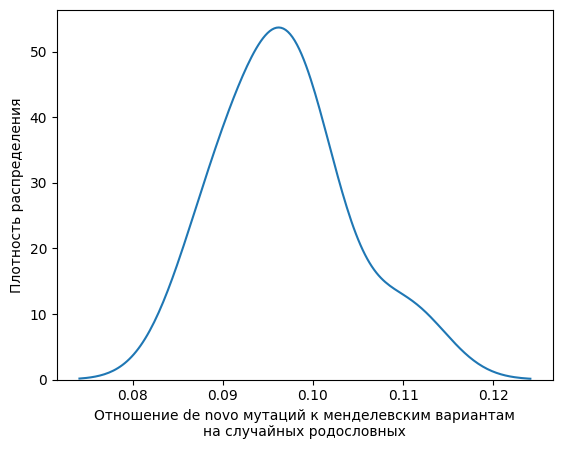

In [ ]:
sns.kdeplot(wrong_trio_stats[(wrong_trio_stats[1] == 'FLT1') & (wrong_trio_stats.dnm_mend_ratio < 0.12)], 
              x='dnm_mend_ratio')
plt.xlabel('Отношение de novo мутаций к менделевским вариантам\nна случайных родословных');
plt.ylabel('Плотность распределения');

In [ ]:
wrong_trio_stats[(wrong_trio_stats[1] == 'FLT1') & (wrong_trio_stats.dnm_mend_ratio < 0.12)].dnm_mend_ratio.describe()

count    8.000000
mean     0.096830
std      0.006942
min      0.087840
25%      0.092666
50%      0.096774
75%      0.099350
max      0.110371
Name: dnm_mend_ratio, dtype: float64

(0.01, 0.16)

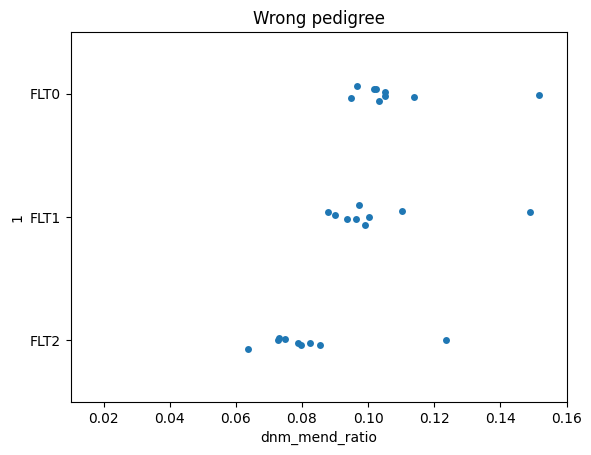

In [ ]:
sns.stripplot(wrong_trio_stats, x='dnm_mend_ratio', y=1).set_title('Wrong pedigree');
plt.xlim(0.01, 0.16)